In [32]:
import skimage
from skimage import data,io, draw, color, transform, util
from skimage.color import rgb2gray, rgb2ypbpr, ypbpr2rgb

import copy


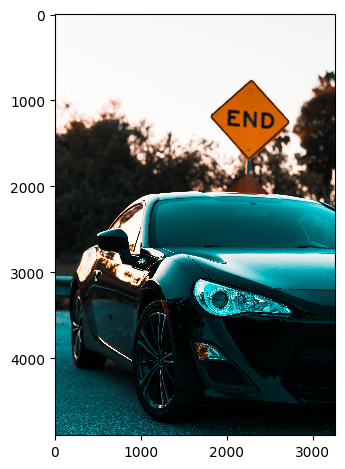

In [26]:
img = io.imread("car.jpg")
io.imshow(img)

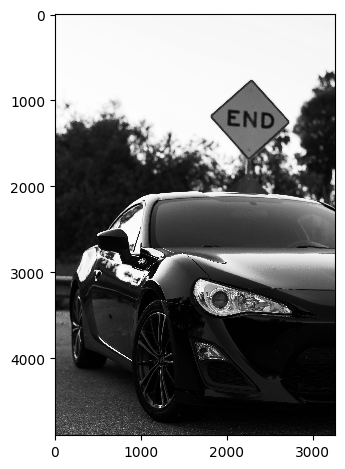

In [27]:
grayscale = rgb2gray(img)    
io.imshow(grayscale)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


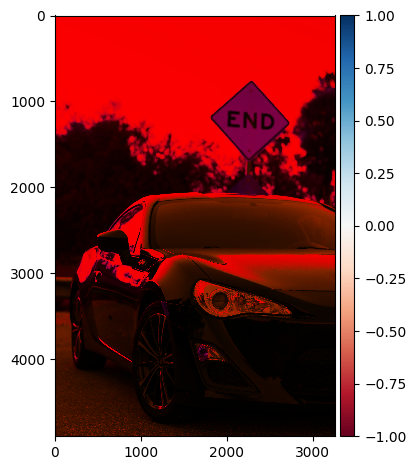

In [28]:
ypbpr = rgb2ypbpr(img)    
io.imshow(ypbpr)


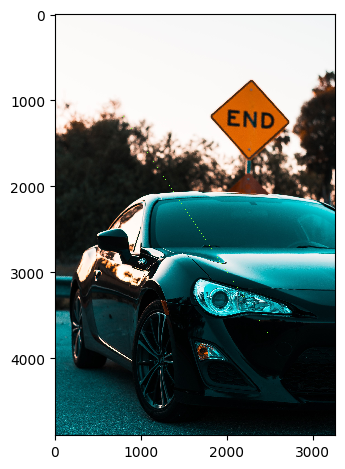

In [48]:
draw_on_image = copy.deepcopy(img)
x,y = draw.line(0,0,4897,3264)
draw_on_image[x, y] = 120,255,50
io.imshow(draw_on_image)

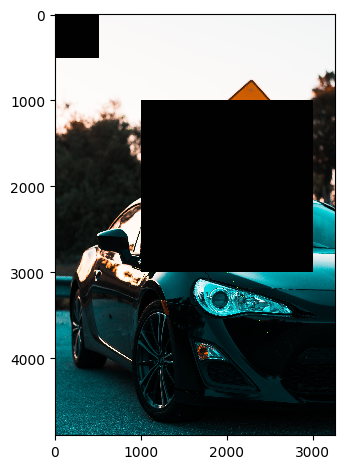

In [51]:
def rectangle(x, y, w, h):
    rr, cc = [x, x + w, x + w, x], [y, y, y + h, y + h]
    return (draw.polygon(rr, cc))


rr, cc = rectangle(1000, 1000, 2000,2000)

draw_on_image[rr, cc] = 1
io.imshow(draw_on_image)

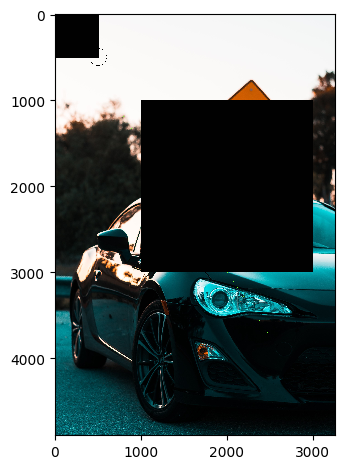

In [60]:
x,y,z=draw.circle_perimeter_aa(500,500, 100)
draw_on_image[x, y] = 1
io.imshow(draw_on_image)

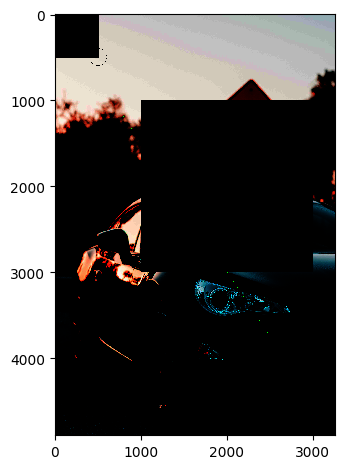

In [65]:
from skimage import exposure
from pylab import *
gamma_corrected1 = exposure.adjust_gamma(draw_on_image, 10)
io.imshow(gamma_corrected1)

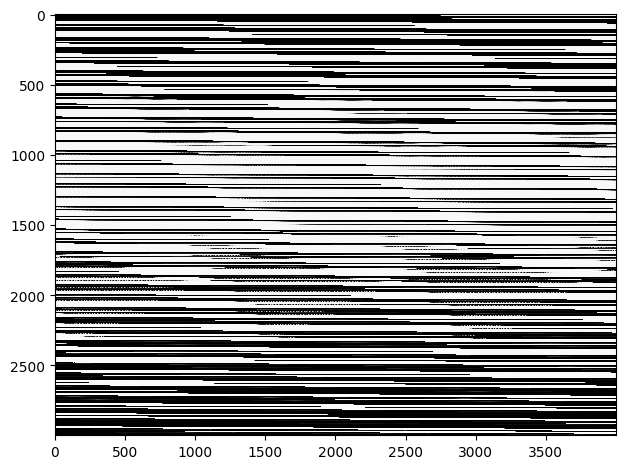

In [69]:
from skimage import io
from skimage.transform import rotate
img_rot = rotate(draw_on_image, 20)
img_res = resize(img_rot, (3000,4000))
io.imshow(img_res)

In [79]:
from skimage import io
from skimage.metrics import structural_similarity as ssim

img_original = io.imread("car.jpg")
img_modified = draw_on_image

img_original = rgb2gray(img_original)
img_modified = rgb2gray(draw_on_image)

ssim_original = ssim(img_original, img_original, data_range=img_original\
                     .max() - img_original.min(), multichannel=True)
ssim_different = ssim(img_original, img_modified, data_range=img_modified\
                      .max() - img_modified.min(), multichannel=True)
print("Orinigal is {}%, simmiliarty is only {}%".format(ssim_original*100,ssim_different*100))

Orinigal is 100.0%, simmiliarty is only 73.7003373476699%
